In [1]:
import Drone
from configurations import defaultConfig 
import numpy as np
from plottingFunctions import state_plots, est_plots
import importlib

## Step Test
Checks to make sure the step function is working and recieving commands properly.

In [2]:
importlib.reload(Drone)

config = defaultConfig()
drone = Drone.Drone(config, config)

thrustCommand = 4.4
fpaCommand = 0/180*np.pi
dynRef = drone.coherentCommand(thrustCommand,fpaCommand)
elivatorRef = drone.elevatorFromAlpha(dynRef[1]-dynRef[3])
stateRef = np.hstack(([0,50], dynRef))
action = (thrustCommand, elivatorRef, dynRef)
drone.reset(stateRef)

drone.step(action)


(array([ 1.21461289e+01,  1.51971193e-01, -1.34941702e-02,  6.52074730e-04]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 1.0,
 False)

## Steady State Response
Expected outcome is a flat plot.  This tests both the calculate coherent command and the dynamics of the plant

/home/matthew/Documents/Flappy-Junco/plottingFunctions.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


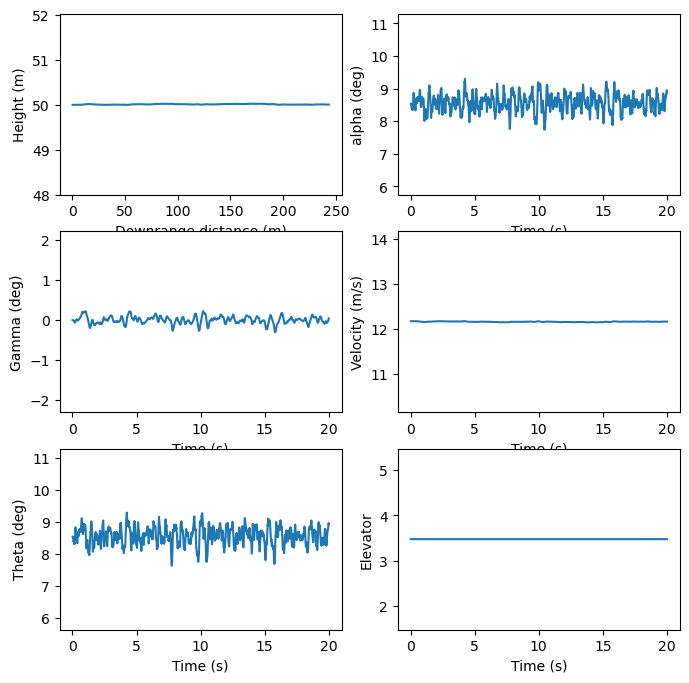

In [3]:
importlib.reload(Drone)

config = defaultConfig()
drone = Drone.Drone(config, config)

thrustCommand = 4.4
fpaCommand = 0/180*np.pi
dynRef = drone.coherentCommand(thrustCommand,fpaCommand)
elivatorRef = drone.elevatorFromAlpha(dynRef[1]-dynRef[3])
stateRef = np.hstack(([0,50], dynRef))
action = (thrustCommand, elivatorRef, dynRef)
drone.reset(stateRef)

iterations = 2000
traj = np.zeros((7,iterations))
thrustCommand = np.zeros(iterations)+action[0]
elvActual = np.zeros(iterations) + action[1]

for iter in range(0, iterations):
    observation, grid, reward, terminated = drone.step(action)
    state = drone.plant.state

    traj[:,iter] = np.hstack((state,drone.plant.time))
    if terminated:
        break
        
state_plots(traj, elvActual)


# Step Response
Expected outcome is a oscolations.  This tests demos the uncontrolled response of the plant.

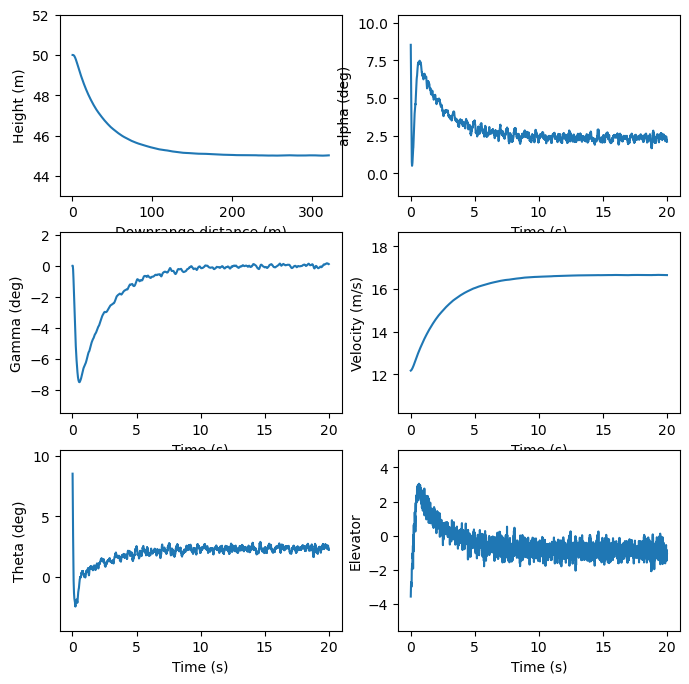

In [4]:
importlib.reload(Drone)

config = defaultConfig()
drone = Drone.Drone(config, config)

thrustCommand = 4.4
fpaCommand = 0/180*np.pi
dynRef = drone.coherentCommand(thrustCommand,fpaCommand)
elivatorRef = drone.elevatorFromAlpha(dynRef[1]-dynRef[3])
stateRef = np.hstack(([0,50], dynRef))
action = (thrustCommand, elivatorRef, dynRef)
drone.reset(stateRef)

# NEW COMMAND
iterations = 2000
traj = np.zeros((7,iterations))
dynRef = drone.coherentCommand(thrustCommand+1,fpaCommand)
elivatorRef = drone.elevatorFromAlpha(dynRef[1]-dynRef[3])
action = (thrustCommand+1, elivatorRef, dynRef)
thrustCommand = np.zeros(iterations)+action[0]
elvActual = np.zeros(iterations) + action[1]

for iter in range(0, iterations):
    observation, grid, reward, terminated = drone.step(action)
    state = drone.plant.state

    traj[:,iter] = np.hstack((state,drone.plant.time))
    elvActual[iter] = drone.delta_e_actual
    if terminated:
        break
        
state_plots(traj, elvActual)


## Filter Response
EKF performance in response to a step command 

/home/matthew/Documents/Flappy-Junco/plottingFunctions.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


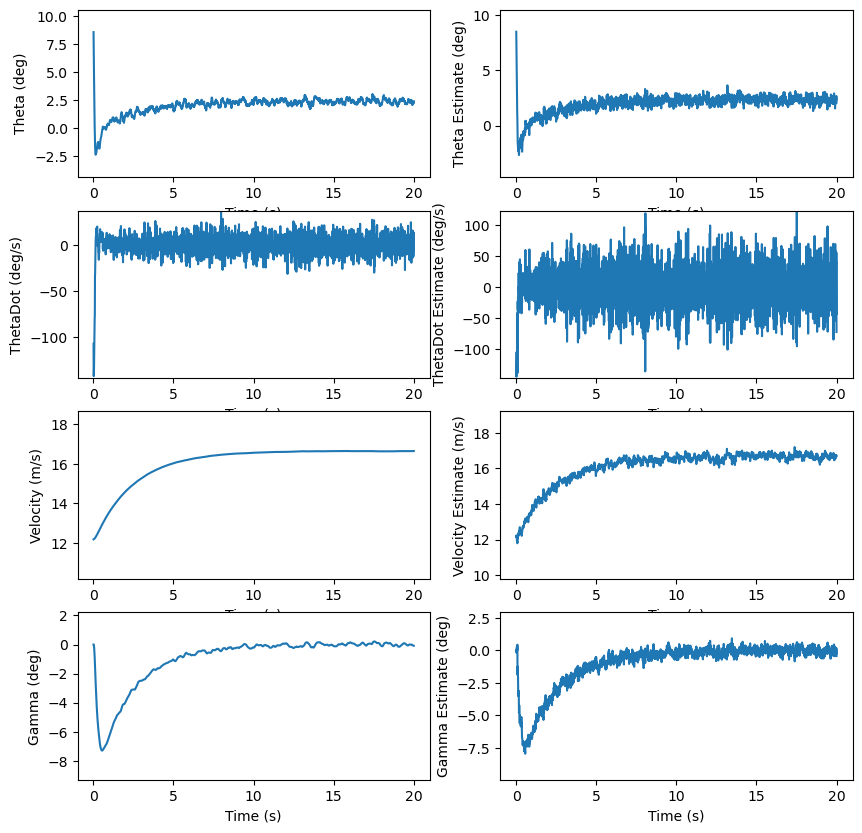

In [5]:
importlib.reload(Drone)

config = defaultConfig()
drone = Drone.Drone(config, config)

thrustCommand = 4.4
fpaCommand = 0/180*np.pi
dynRef = drone.coherentCommand(thrustCommand,fpaCommand)
elivatorRef = drone.elevatorFromAlpha(dynRef[1]-dynRef[3])
stateRef = np.hstack(([0,50], dynRef))
action = (thrustCommand, elivatorRef, dynRef)
drone.reset(stateRef)

# NEW COMMAND
iterations = 2000
traj = np.zeros((7,iterations))
trajEst = np.zeros((4,iterations))
dynRef = drone.coherentCommand(thrustCommand+1,fpaCommand)
elivatorRef = drone.elevatorFromAlpha(dynRef[1]-dynRef[3])
action = (thrustCommand+1, elivatorRef, dynRef)
thrustCommand = np.zeros(iterations)+action[0]
elvActual = np.zeros(iterations) + action[1]

for iter in range(0, iterations):
    observation, grid, reward, terminated = drone.step(action)
    state = drone.plant.state
    stateEst = drone.stateEstimate


    traj[:,iter] = np.hstack((state,drone.plant.time))
    trajEst[:,iter] = stateEst

    elvActual[iter] = drone.delta_e_actual
    if terminated:
        break
        
est_plots(traj, trajEst)
